In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from xgboost import XGBRegressor

In [29]:
# 2. LOAD DATASET
df = pd.read_csv("M:\\mansi\\Documents\\Agricultural Commodity Price Prediction and Market Analysis.csv")

# Clean column names
df.columns = df.columns.str.replace('_x0020_', '_').str.strip()

print("Columns:", df.columns.tolist())
print(df.head())
print(df.info())


Columns: ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_Price', 'Max_Price', 'Modal_Price']
         State District         Market Commodity         Variety  \
0  West Bengal    Nadia  Karimpur APMC   Mustard  Yellow (Black)   
1  West Bengal    Nadia  Karimpur APMC    Potato           Jyoti   
2  West Bengal    Nadia  Karimpur APMC     Onion           Nasik   
3  West Bengal    Nadia  Karimpur APMC      Jute            TD-5   
4  West Bengal  Burdwan   Guskara APMC   Brinjal      Round/Long   

           Grade Arrival_Date  Min_Price  Max_Price  Modal_Price  
0  Grade Range-1   07-12-2025     6800.0     7000.0       6900.0  
1        Grade A   07-12-2025     1420.0     1440.0       1430.0  
2        Grade A   07-12-2025     1900.0     2100.0       2000.0  
3     TD 1 (FAQ)   07-12-2025     8600.0     8800.0       8700.0  
4            FAQ   07-12-2025     3800.0     4000.0       3900.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 ent

In [30]:
# 3. HANDLE MISSING VALUES
df = df.dropna(subset=['Modal_Price'])

num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

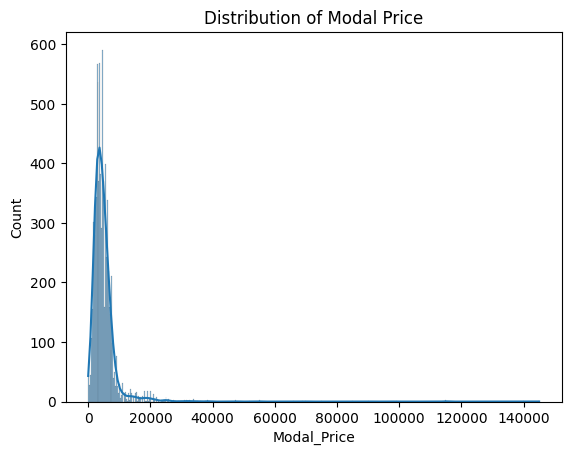

In [31]:
# Histogram
sns.histplot(df['Modal_Price'], kde=True)
plt.title("Distribution of Modal Price")
plt.show()

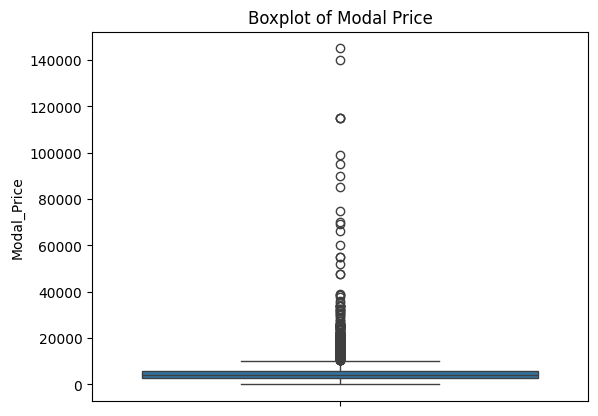

In [32]:
# Boxplot
sns.boxplot(y=df['Modal_Price'])
plt.title("Boxplot of Modal Price")
plt.show()

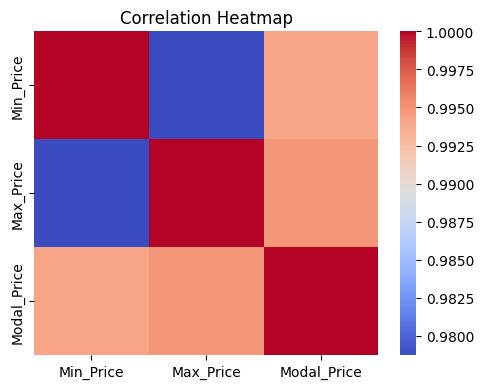

In [33]:
# Correlation Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [34]:
# 5. LABEL ENCODING
le = LabelEncoder()
cat_cols = ['State','District','Market','Commodity','Variety','Grade']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [35]:
# 6. FEATURE & TARGET
X = df.drop(columns=['Modal_Price','Arrival_Date'])
y = df['Modal_Price']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (8005, 8)
y shape: (8005,)


In [36]:
# 7. TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
# 8. RANDOM FOREST MODEL
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))


# 9. XGBOOST MODEL
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb))

# 10. PCA (DIMENSION REDUCTION)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("After PCA:", X_pca.shape[1])

# 11. KMEANS CLUSTERING
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df['Cluster'].value_counts())

Random Forest R2 Score: 0.9968791425109007
XGBoost R2 Score: 0.9735454308552781
Original features: 8
After PCA: 6
Cluster
2    3626
0    3262
1    1117
Name: count, dtype: int64


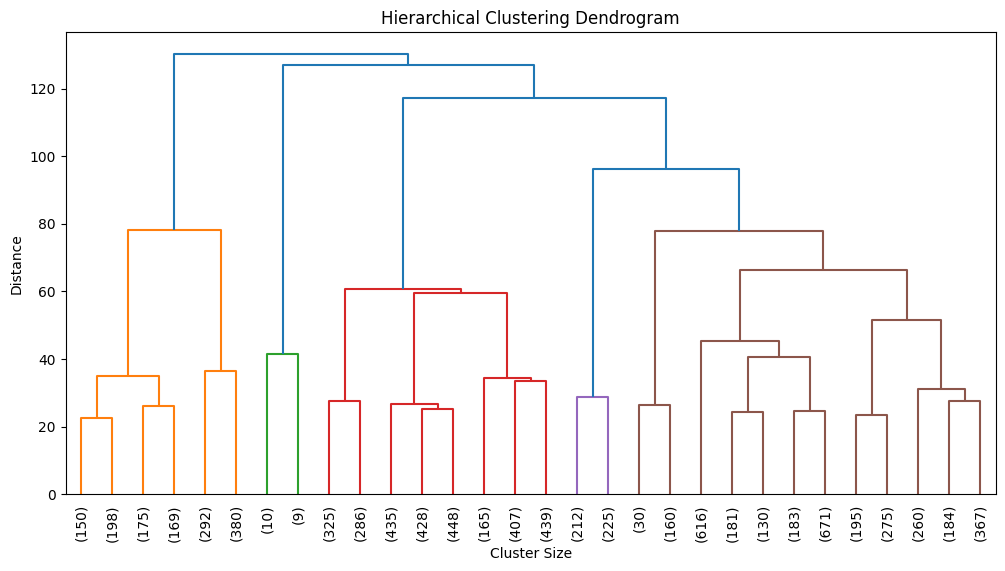

In [38]:
# 12. DENDROGRAM
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

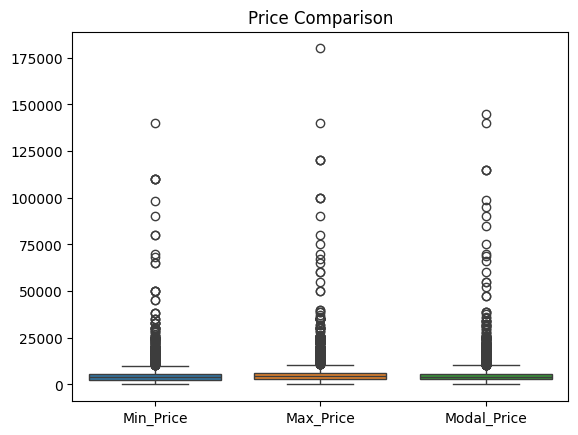

In [39]:
# Price comparison boxplot
sns.boxplot(data=df[['Min_Price','Max_Price','Modal_Price']])
plt.title("Price Comparison")
plt.show()

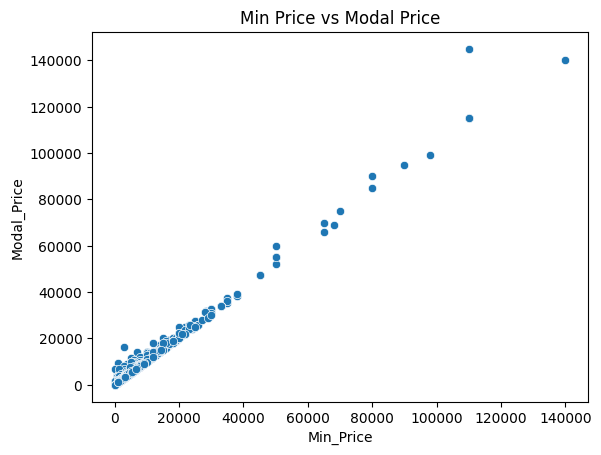

In [40]:
# Scatter plots
sns.scatterplot(x=df['Min_Price'], y=df['Modal_Price'])
plt.title("Min Price vs Modal Price")
plt.show()

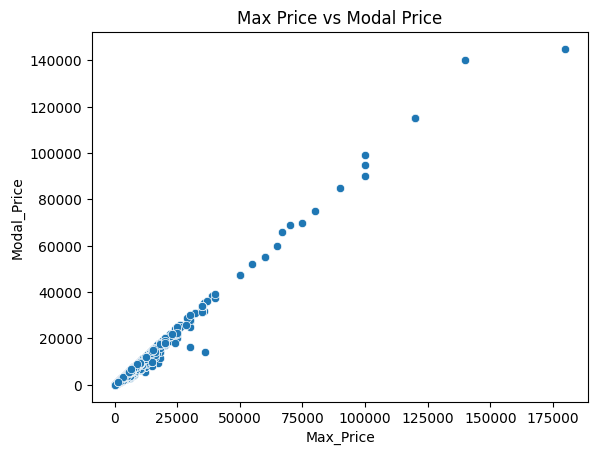

In [41]:
sns.scatterplot(x=df['Max_Price'], y=df['Modal_Price'])
plt.title("Max Price vs Modal Price")
plt.show()

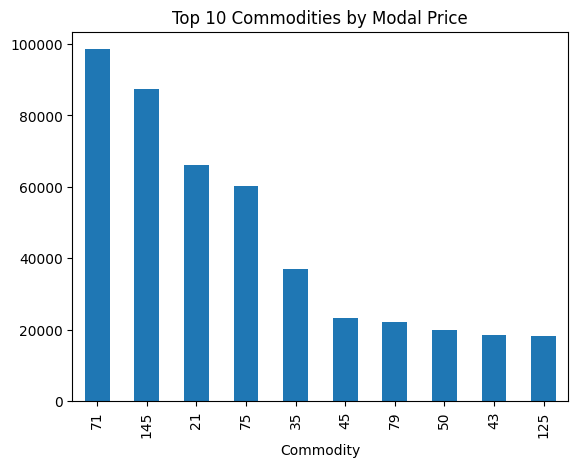

In [42]:
# Top commodities
df.groupby('Commodity')['Modal_Price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Commodities by Modal Price")
plt.show()

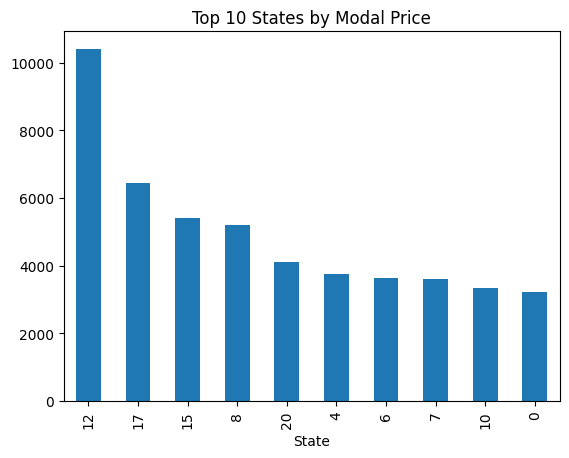

In [43]:
# Top states
df.groupby('State')['Modal_Price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 States by Modal Price")
plt.show()

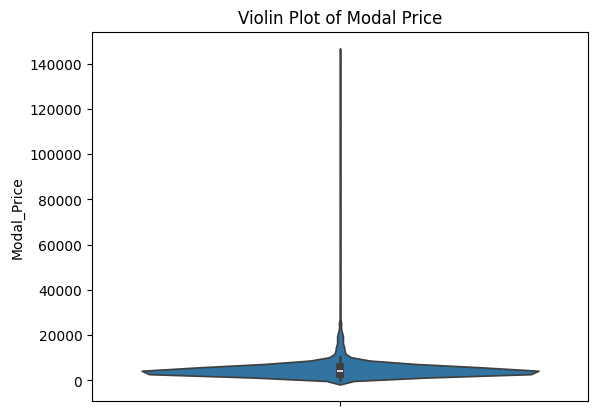

In [44]:
# Violin plot
sns.violinplot(y=df['Modal_Price'])
plt.title("Violin Plot of Modal Price")
plt.show()